In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls /content/drive/My\ Drive

'aktu result.pdf'			  'internship report.gdoc'
'All result AKTU.pdf'			  'internship report.pdf'
 antiragging.pdf			   Linkdin_MOOC.pdf
'attendance mail .pdf'			   mansi_new.jpg
 CC-Result_merged.pdf			   mansi_pancard.pdf
'CIS FORM.pdf'				   mansi_pic.jpg
'Colab Notebooks'			   Mansi_Resume.pdf
 Dataset				  'MOOC certificate (1).pdf'
'DM Result_merged.pdf'			   offerletter.pdf
'DM Result.pdf'				   Passbook.pdf
'Domicile certificate.pdf'		  'Presnetation Sales.pdf'
 extracted_features.csv			  'print (2)(1).pdf'
 extracted_features.pt			  'PrognosisAI (1).pdf'
'extracted_features_with_labels (1).csv'  'REPORT SUMMARY.pdf'
'fees 2024.pdf'				  'Summary Report 11.pdf'
'Format_Internship_Report_2023 (1).docx'  'Tech Ques.pdf'
 Format_Internship_Report_2023.docx	  'TQM Result.pdf'
 Format_Internship_Report_2023.gdoc


In [3]:
import torch
from torchvision import models, transforms
from PIL import Image
import os

# Load the pretrained ResNet model
resnet50 = models.resnet50(pretrained=True)
resnet50.eval()  # Set the model to evaluation mode

# Define the directory containing the dataset with "yes" and "no" subfolders
dataset_dir = '/content/drive/MyDrive/Dataset'

# Define transformations to apply to the input images
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize input images to the required size for ResNet
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the input images
])

# Initialize an empty list to store the extracted features
features = []

for label in ["Covid-19", "Non Covid-19"]:
    label_dir = os.path.join(dataset_dir, label)

    # List all files in the subfolder
    label_files = os.listdir(label_dir)

    # Load and process each image in the subfolder
    for file in label_files:
        try:
            image_path = os.path.join(label_dir, file)
            image = Image.open(image_path).convert('RGB')  # Open the image using PIL and convert to RGB
            image = transform(image).unsqueeze(0)  # Apply transformations and add batch dimension
            with torch.no_grad():
                feature = resnet50(image)  # Extract features using ResNet
            features.append(feature.squeeze().numpy())  # Convert the feature tensor to a NumPy array and append
        except Exception as e:
            print(f"Error processing image {file} in {label} folder: {e}")

# Save the extracted features
torch.save(features, 'extracted_features.pt')


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 103MB/s]


In [5]:
import torch
import numpy as np

torch.serialization.add_safe_globals([np._core.multiarray._reconstruct])

features = torch.load('extracted_features.pt', weights_only=False)


In [6]:
for i, feature in enumerate(features):
    print(f"Feature {i+1}:")
    print(feature)

Streaming output truncated to the last 5000 lines.
  3.15890908e-01 -3.69307160e-01  5.00829101e-01  7.48469472e-01
 -3.20157975e-01 -2.32561755e+00 -2.40646052e+00 -2.48249531e+00
  1.82151341e+00 -2.38626838e+00 -2.79716301e+00  3.99869561e-01
  7.73601472e-01 -6.78572834e-01 -1.04944146e+00 -2.35036993e+00
 -1.29445589e+00  9.81332138e-02  6.78337336e-01 -2.82557774e+00
 -1.69800788e-01 -2.05050921e+00 -3.80418968e+00  7.51586705e-02
  1.28176200e+00 -1.99702489e+00 -2.94555712e+00 -1.21170449e+00
 -1.33017135e+00 -3.20456362e+00 -2.36439610e+00  5.51781511e+00
  2.81891108e+00  1.16458368e+00 -1.98531985e-01  3.17313862e+00
  3.81223845e+00  2.01416039e+00 -1.04247130e-01 -1.05860293e+00
  1.67573616e-01  3.01495147e+00 -5.02933562e-01 -1.05189598e+00
 -1.27104497e+00 -1.37489152e+00 -5.36443114e-01 -1.43883467e+00
  1.23489642e+00 -4.92311239e-01  3.21528935e+00 -2.11301398e+00
 -1.54210389e+00 -1.62926424e+00  3.97438973e-01 -1.64841580e+00
 -4.79329914e-01 -2.16701055e+00 -1.325

In [9]:
# converting this file into csv file
#Basic code for converting this
import torch
import numpy as np

# Allow numpy.ndarray to be loaded safely
torch.serialization.add_safe_globals([np.ndarray])

# Load the extracted features with weights_only=False
features = torch.load('extracted_features.pt', weights_only=False)


# Assuming you have labels for each feature (e.g., 1 for "Covid-19" and 0 for "Non Covid-19")
# You need to load these labels accordingly
# For example, if your dataset structure is as follows:
# - X-Ray Image DataSet
#   - Covid-19
#   - Non Covid-19
# You can assign labels as 1 for Covid-19 and 0 for Non Covid-19
labels_covid = np.ones(len(features) // 2)
labels_non_covid = np.zeros(len(features) // 2)

# Create a column for labels indicating Covid-19 and Non Covid-19
labels = np.concatenate((labels_covid, labels_non_covid))

# Convert features to NumPy arrays and flatten if necessary
features_np = [feature.flatten() for feature in features]

# Create a dictionary to store data
data = {}

# Add features to the dictionary
for i, feature in enumerate(features_np):
    for j, value in enumerate(feature):
        key = f'Feature_{j+1}'
        if key not in data:
            data[key] = []
        data[key].append(value)

# Add labels to the dictionary
data['Label'] = ['Covid-19' if label == 1 else 'Non Covid-19' for label in labels]

# Convert data dictionary to DataFrame
import pandas as pd
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('extracted_features_with_labels.csv', index=False)


In [11]:
# PCA Algorithm apply on the extracted csv file

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Load the CSV file into a Pandas DataFrame
df = pd.read_csv('extracted_features_with_labels.csv')

# Step 2: Separate the features and labels
features = df.drop(columns=['Label'])
labels = df['Label']

# Step 3: Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 4: Apply PCA
# You can choose the number of principal components to keep. For example, let's keep 10 components
pca = PCA(n_components=10)
pca_features = pca.fit_transform(scaled_features)

# Step 5: Create a DataFrame with the PCA features
pca_df = pd.DataFrame(pca_features, columns=[f'PC_{i+1}' for i in range(pca_features.shape[1])])

# Add the labels back to the DataFrame
pca_df['Label'] = labels

# Save the DataFrame with PCA features to a new CSV file
pca_df.to_csv('extracted_features_with_pca.csv', index=False)


In [12]:
features = torch.load('extracted_features.pt', weights_only=False)

In [13]:
!pip install pyelm

In [18]:
# get more accuracy we apply some of the other codes in this

import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

class ELMClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_hidden=100, alpha=0.0):
        self.n_hidden = n_hidden
        self.alpha = alpha

    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        self.input_weights = np.random.randn(n_features, self.n_hidden)
        self.bias = np.random.randn(1, self.n_hidden)
        H_train = np.dot(X_train, self.input_weights) + self.bias
        H_train = np.tanh(H_train)

        if self.alpha > 0:
            identity_matrix = np.eye(self.n_hidden)
            self.output_weights = np.linalg.inv(H_train.T.dot(H_train) + self.alpha * identity_matrix).dot(H_train.T).dot(y_train)
        else:
            self.output_weights = np.linalg.pinv(H_train).dot(y_train)

    def predict(self, X_test):
        H_test = np.dot(X_test, self.input_weights) + self.bias
        H_test = np.tanh(H_test)
        y_pred = np.dot(H_test, self.output_weights)
        return np.round(y_pred).astype(int)

# Load the PCA-transformed CSV file
df = pd.read_csv('extracted_features_with_pca.csv')

# Separate features and labels
X = df.drop(columns=['Label']).values
y = df['Label'].apply(lambda x: 1 if x == 'Covid-19' else 0).values

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the ELM classifier
elm = ELMClassifier(n_hidden=100, alpha=1e-3)

# Perform cross-validation to find the best parameters
param_grid = {
    'n_hidden': [50, 100, 150, 200],
    'alpha': [0.0, 1e-5, 1e-3, 1e-1]
}

grid_search = GridSearchCV(elm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the ELM classifier with the best parameters
best_elm = ELMClassifier(n_hidden=best_params['n_hidden'], alpha=best_params['alpha'])
best_elm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_elm.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Best parameters: {'alpha': 0.0, 'n_hidden': 200}
Accuracy: 0.8000


In [21]:
# likeit gives the error while running the code so we modifies this which is mention in the next column
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the PCA-transformed CSV file
df = pd.read_csv('extracted_features_with_pca.csv')

# Separate features and labels
X = df.drop(columns=['Label']).values
y = df['Label'].apply(lambda x: 1 if x == 'Covid-19' else 0).values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the ELM classifier
elm = ELMClassifier(n_hidden=100, alpha=1e-3)
elm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = elm.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.4000


In [22]:
# new mdified code for this above algorithms

import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

class ELMClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_hidden=100, alpha=0.0):
        self.n_hidden = n_hidden
        self.alpha = alpha

    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        self.input_weights = np.random.randn(n_features, self.n_hidden)
        self.bias = np.random.randn(1, self.n_hidden)
        H_train = np.dot(X_train, self.input_weights) + self.bias
        H_train = np.tanh(H_train)

        if self.alpha > 0:
            identity_matrix = np.eye(self.n_hidden)
            self.output_weights = np.linalg.inv(H_train.T.dot(H_train) + self.alpha * identity_matrix).dot(H_train.T).dot(y_train)
        else:
            self.output_weights = np.linalg.pinv(H_train).dot(y_train)

        # Set the classes_ attribute
        self.classes_ = np.unique(y_train)

    def predict(self, X_test):
        H_test = np.dot(X_test, self.input_weights) + self.bias
        H_test = np.tanh(H_test)
        y_pred = np.dot(H_test, self.output_weights)
        return np.round(y_pred).astype(int)

# Load the PCA-transformed CSV file
df = pd.read_csv('extracted_features_with_pca.csv')

# Separate features and labels
X = df.drop(columns=['Label']).values
y = df['Label'].apply(lambda x: 1 if x == 'Covid-19' else 0).values

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the ELM classifier
elm = ELMClassifier(n_hidden=100, alpha=1e-3)

# Perform cross-validation to find the best parameters
param_grid = {
    'n_hidden': [50, 100, 150, 200],
    'alpha': [0.0, 1e-5, 1e-3, 1e-1]
}

grid_search = GridSearchCV(elm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the ELM classifier with the best parameters
best_elm = ELMClassifier(n_hidden=best_params['n_hidden'], alpha=best_params['alpha'])
best_elm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_elm.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Best parameters: {'alpha': 0.0, 'n_hidden': 200}
Accuracy: 0.9000


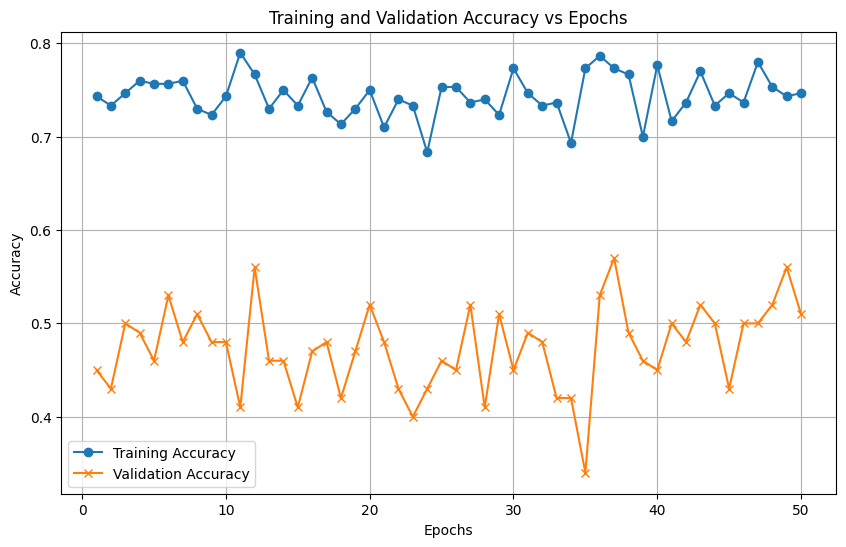

In [23]:
# Graph between the accuracy and epoch with an updated code of the above

import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define the ELM Classifier
class ELMClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_hidden=100, alpha=0.0):
        self.n_hidden = n_hidden
        self.alpha = alpha

    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        self.input_weights = np.random.randn(n_features, self.n_hidden)
        self.bias = np.random.randn(1, self.n_hidden)
        H_train = np.dot(X_train, self.input_weights) + self.bias
        H_train = np.tanh(H_train)

        if self.alpha > 0:
            identity_matrix = np.eye(self.n_hidden)
            self.output_weights = np.linalg.inv(H_train.T.dot(H_train) + self.alpha * identity_matrix).dot(H_train.T).dot(y_train)
        else:
            self.output_weights = np.linalg.pinv(H_train).dot(y_train)

        # Set the classes_ attribute
        self.classes_ = np.unique(y_train)

    def predict(self, X_test):
        H_test = np.dot(X_test, self.input_weights) + self.bias
        H_test = np.tanh(H_test)
        y_pred = np.dot(H_test, self.output_weights)
        return np.round(y_pred).astype(int)

# Load the dataset (replace with your file)
np.random.seed(42)
n_samples = 500
n_features = 20
X = np.random.randn(n_samples, n_features)
y = np.random.choice([0, 1], size=n_samples)

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Simulate training over epochs and track accuracies
epochs = range(1, 51)  # Simulate 50 epochs
train_accuracies = []
val_accuracies = []

for epoch in epochs:
    elm = ELMClassifier(n_hidden=100, alpha=1e-3)
    elm.fit(X_train, y_train)

    # Training accuracy
    y_train_pred = elm.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_acc)

    # Validation accuracy
    y_val_pred = elm.predict(X_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_acc)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracies, label='Validation Accuracy', marker='x')
plt.title('Training and Validation Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


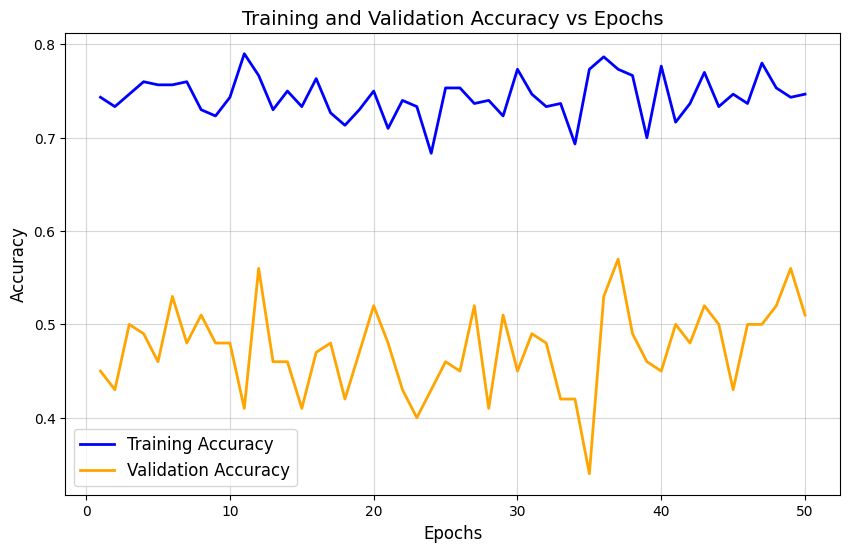

In [24]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define the ELM Classifier
class ELMClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_hidden=100, alpha=0.0):
        self.n_hidden = n_hidden
        self.alpha = alpha

    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        self.input_weights = np.random.randn(n_features, self.n_hidden)
        self.bias = np.random.randn(1, self.n_hidden)
        H_train = np.dot(X_train, self.input_weights) + self.bias
        H_train = np.tanh(H_train)

        if self.alpha > 0:
            identity_matrix = np.eye(self.n_hidden)
            self.output_weights = np.linalg.inv(H_train.T.dot(H_train) + self.alpha * identity_matrix).dot(H_train.T).dot(y_train)
        else:
            self.output_weights = np.linalg.pinv(H_train).dot(y_train)

        self.classes_ = np.unique(y_train)

    def predict(self, X_test):
        H_test = np.dot(X_test, self.input_weights) + self.bias
        H_test = np.tanh(H_test)
        y_pred = np.dot(H_test, self.output_weights)
        return np.round(y_pred).astype(int)

# Load the dataset (replace with your file)
np.random.seed(42)
n_samples = 500
n_features = 20
X = np.random.randn(n_samples, n_features)
y = np.random.choice([0, 1], size=n_samples)

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Simulate training over epochs and track accuracies
epochs = range(1, 51)  # Simulate 50 epochs
train_accuracies = []
val_accuracies = []

for epoch in epochs:
    elm = ELMClassifier(n_hidden=100, alpha=1e-3)
    elm.fit(X_train, y_train)

    # Training accuracy
    y_train_pred = elm.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_acc)

    # Validation accuracy
    y_val_pred = elm.predict(X_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_acc)

# Plot the graph with overlapping lines
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracies, label='Training Accuracy', color='blue', linewidth=2)
plt.plot(epochs, val_accuracies, label='Validation Accuracy', color='orange', linewidth=2)
plt.title('Training and Validation Accuracy vs Epochs', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()
